In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [236]:
!pip install xgboost

In [237]:
dataset = pd.read_csv('Train_v2.csv')
data = pd.read_csv('Test_v2.csv')
test_data = data.drop(columns=['country', 'year', 'uniqueid'])
X = dataset.drop(columns=['bank_account', 'uniqueid'])
y = dataset.iloc[:, 3:4].values

In [238]:
print('Check missing values:', X.isnull().sum())

Check missing values: country                   0
year                      0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [239]:
df = pd.DataFrame(dataset)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


col_0     Count
country        
Rwanda     8735
Tanzania   6620
Kenya      6068
Uganda     2101


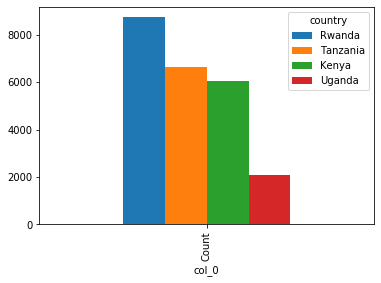

In [241]:
my_tab = pd.crosstab(index=df["country"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

col_0  Count
year        
2016    8735
2018    8169
2017    6620


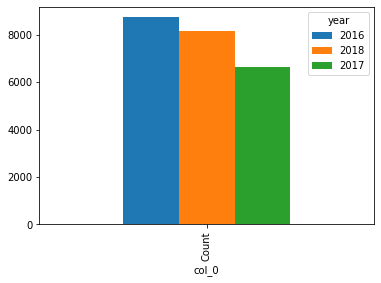

In [242]:
my_tab = pd.crosstab(index=df["year"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

col_0         Count
bank_account       
No            20212
Yes            3312


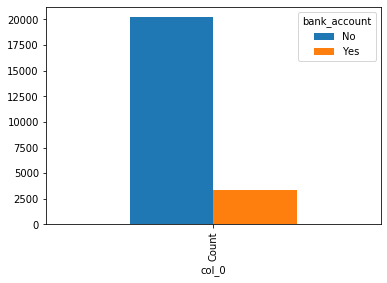

In [243]:
my_tab = pd.crosstab(index=df["bank_account"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

col_0          Count
location_type       
Rural          14343
Urban           9181


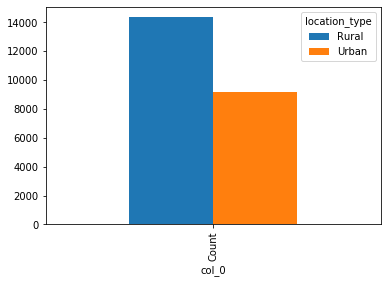

In [244]:
my_tab = pd.crosstab(index=df["location_type"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

col_0             Count
cellphone_access       
Yes               17454
No                 6070


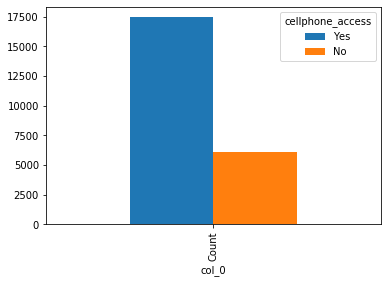

In [245]:
my_tab = pd.crosstab(index=df["cellphone_access"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

col_0                   Count
relationship_with_head       
Head of Household       12831
Spouse                   6520
Child                    2229
Parent                   1086
Other relative            668
Other non-relatives       190


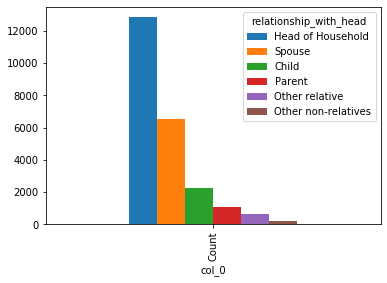

In [246]:
my_tab = pd.crosstab(index=df["relationship_with_head"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

col_0                 Count
gender_of_respondent       
Female                13877
Male                   9647


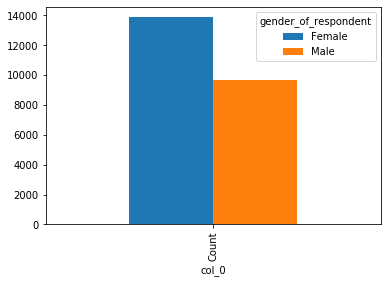

In [247]:
my_tab = pd.crosstab(index=df["gender_of_respondent"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

col_0                    Count
marital_status                
Married/Living together  10749
Single/Never Married      7983
Widowed                   2708
Divorced/Seperated        2076
Dont know                    8


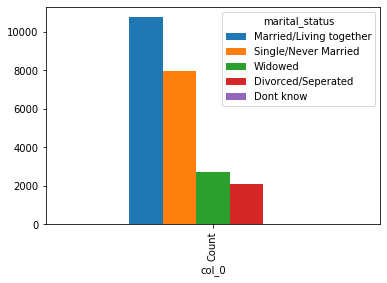

In [248]:
my_tab = pd.crosstab(index=df["marital_status"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

col_0                            Count
education_level                       
Primary education                12791
No formal education               4515
Secondary education               4223
Tertiary education                1157
Vocational/Specialised training    803
Other/Dont know/RTA                 35


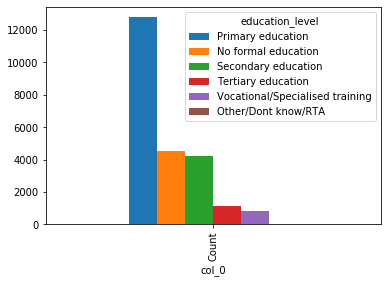

In [249]:
my_tab = pd.crosstab(index=df["education_level"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

col_0                         Count
job_type                           
Self employed                  6437
Informally employed            5597
Farming and Fishing            5441
Remittance Dependent           2527
Other Income                   1080
Formally employed Private      1055
No Income                       627
Formally employed Government    387
Government Dependent            247
Dont Know/Refuse to answer      126


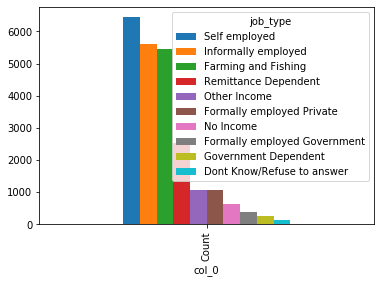

In [250]:
my_tab = pd.crosstab(index=df["job_type"], columns="Count") 
my_tab = my_tab.sort_values('Count', ascending=[False])
print(my_tab)
data_counts = pd.DataFrame(my_tab) 
pd.DataFrame(data_counts).transpose().plot(kind='bar', stacked=False)

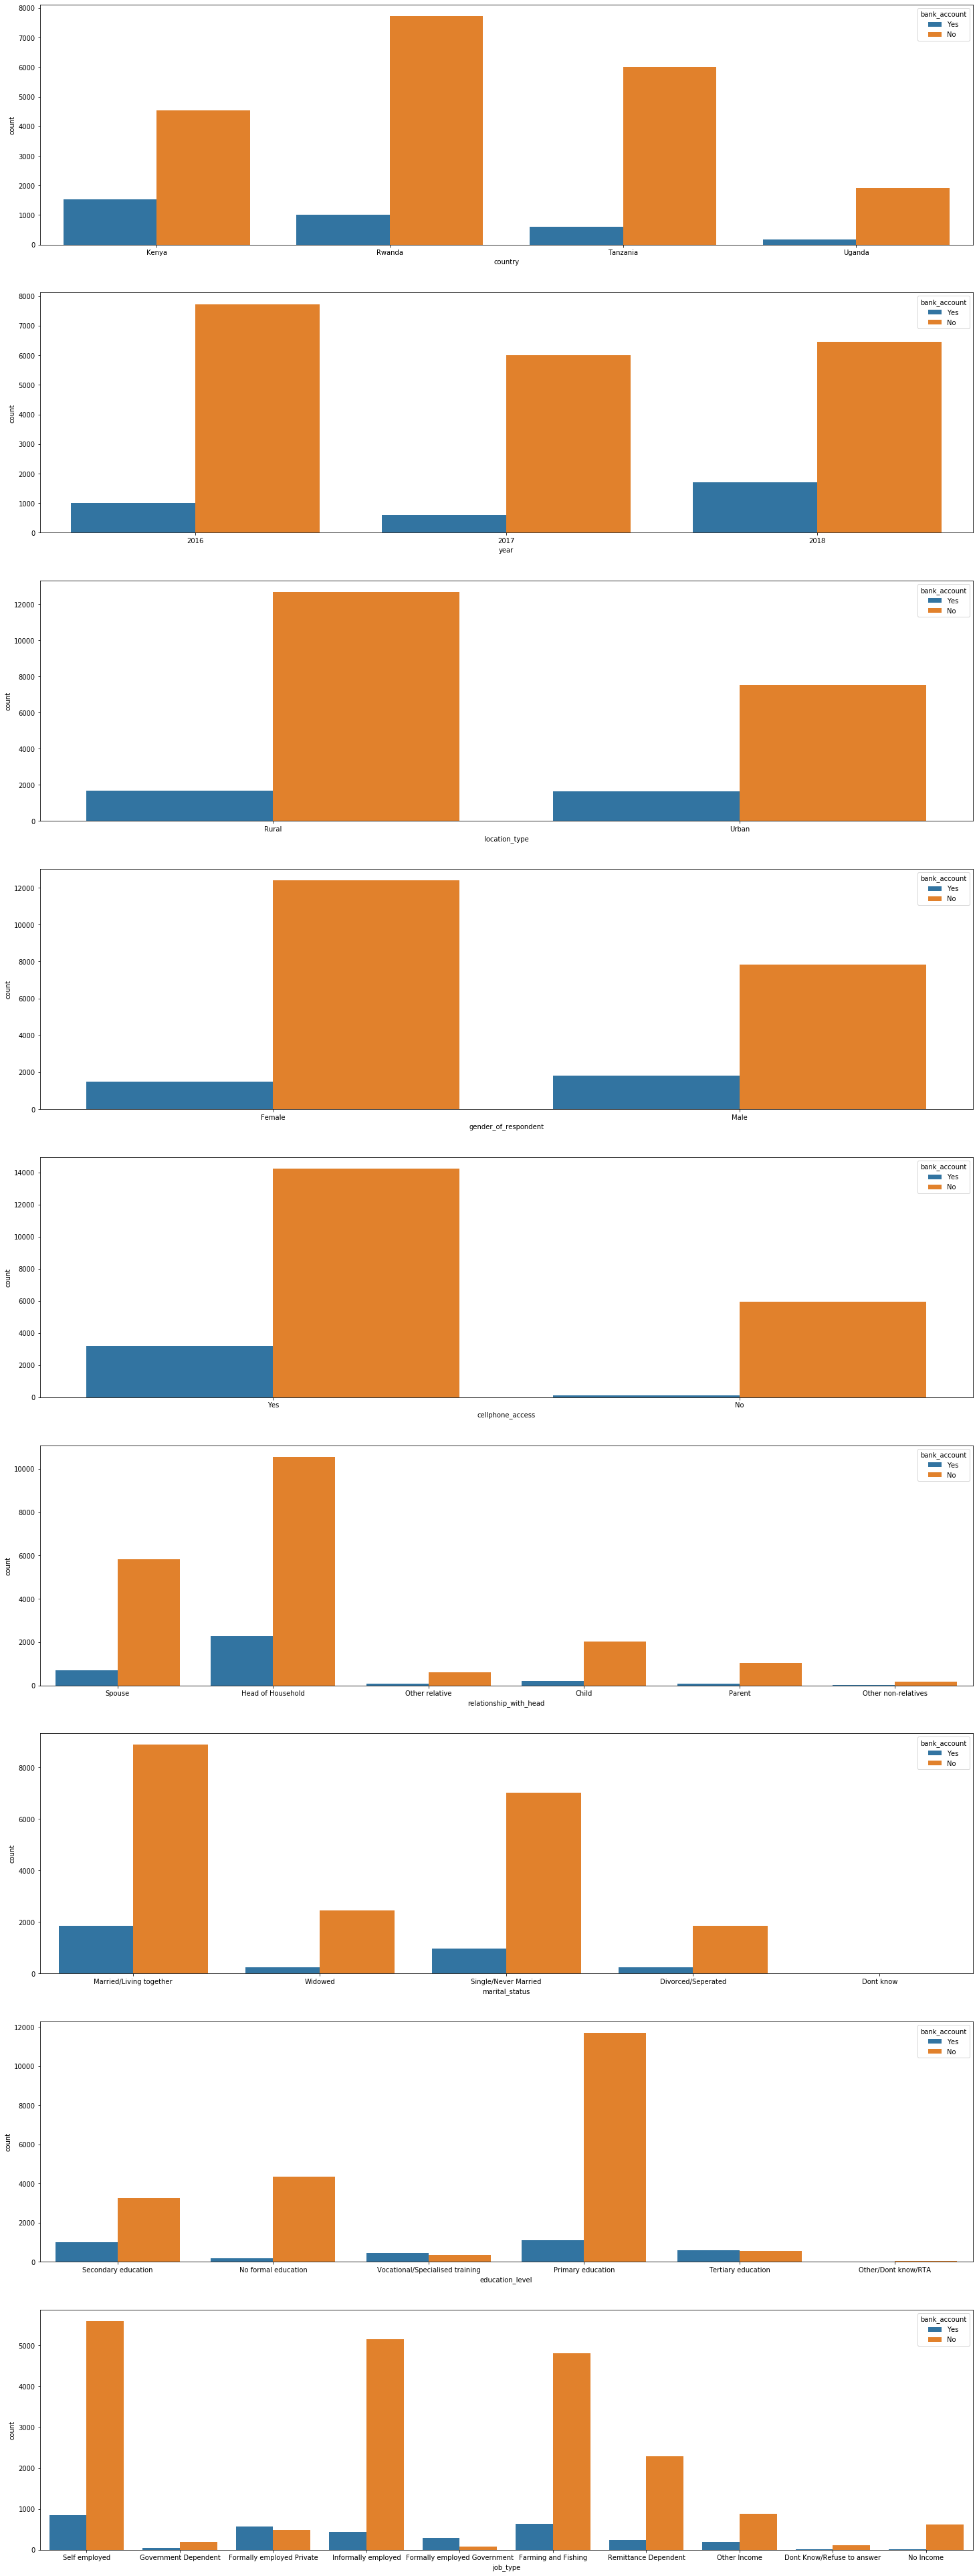

In [251]:
f, axes = plt.subplots(9, 1, figsize=[25, 70])

sns.countplot('country', hue= 'bank_account', data=dataset, ax=axes[0])
sns.countplot('year', hue= 'bank_account', data=dataset, ax=axes[1])
sns.countplot('location_type', hue= 'bank_account', data=dataset, ax=axes[2])
sns.countplot('gender_of_respondent', hue= 'bank_account', data=dataset, ax=axes[3])
sns.countplot('cellphone_access', hue= 'bank_account', data=dataset, ax=axes[4])
sns.countplot('relationship_with_head', hue= 'bank_account', data=dataset, ax=axes[5])
sns.countplot('marital_status', hue= 'bank_account', data=dataset, ax=axes[6])
sns.countplot('education_level', hue= 'bank_account', data=dataset, ax=axes[7])
sns.countplot('job_type', hue= 'bank_account', data=dataset, ax=axes[8])

In [252]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

C:\Users\Tijani Mubarak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [253]:
categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type']
X = pd.get_dummies(X, prefix_sep='_', columns = categ)
test_data = pd.get_dummies(test_data, prefix_sep='_', columns = categ)


In [254]:
from sklearn.preprocessing import LabelEncoder
encode_A = LabelEncoder()
test_data['location_type'] = le.fit_transform(test_data['location_type'])
test_data['cellphone_access'] = le.fit_transform(test_data['cellphone_access'])
test_data['gender_of_respondent'] = le.fit_transform(test_data['gender_of_respondent'])

In [255]:
from sklearn.preprocessing import LabelEncoder
encode_A = LabelEncoder()
X['location_type'] = le.fit_transform(X['location_type'])
X['cellphone_access'] = le.fit_transform(X['cellphone_access'])
X['gender_of_respondent'] = le.fit_transform(X['gender_of_respondent'])
X['country'] = le.fit_transform(X['country'])

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state = 10,learning_rate = 0.1, colsample_bytree=0.5,reg_alpha=0.5, max_delta_step=1, min_child_weight=0.1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=1, max_depth=6,
              min_child_weight=0.1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0.5,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [258]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [259]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
Error = 1 - accuracy_score(y_test, y_pred)
print('Error rate of XGboost Model:' +" "+ str(Error))

[[3961  102]
 [ 404  238]]
0.8924548352816153
Error rate of XGboost Model: 0.10754516471838471
